In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
from shapely.geometry import Point
from glob import glob 

from inspect import cleandoc as dedent
from mpl_toolkits.basemap import Basemap

# Start with source bin/activate


In [2]:
def GetContri(path):
    results = [y for x in os.walk(path) for y in glob(os.path.join(x[0], 'Readme.md'))]
    Name = []
    Pos = []
    lon = []
    lat = []
    for eachContri in results:
        with open(eachContri) as FileContent:
            for line in FileContent: 
                if line.startswith( 'pos: ' ):
                    Coordon = line.replace('pos: ',"").strip()
                    Pos.append(Coordon)
                    X = float(Coordon.split(",")[0])
                    Y = float(Coordon.split(",")[1])
                    lon.append(X)
                    lat.append(Y)
                if line.startswith( 'who: ' ):
                    Name.append(line.replace('who: ',"").strip())
    return Name,Pos,lon,lat

In [3]:
Contrib = GetContri("./")
NbContrib = np.shape(Contrib)[1]

In [4]:
df = pd.DataFrame(data=Contrib, index=["who", "pos","lat","lon"]).T
df

,who,pos,lat,lon
0,Lee,"37.8694561, 127.7444707",37.8695,127.744
1,Erick,"37.4299358,-122.1693014",37.4299,-122.169
2,Felix,"49.1630266,11.656955",49.163,11.657
3,Jan,"52.520008,13.404954",52.52,13.405
4,Arash,"41.6997562,-86.2384502",41.6998,-86.2385
...,...,...,...,...
75,William,"40.804496782,-73.957162838",40.8045,-73.9572
76,Kim,"37.433347,127.162363",37.4333,127.162
77,Stephanie,"42.4090619,-71.055754",42.4091,-71.0558
78,Lewis,"22.3524813, 113.8468056",22.3525,113.847


In [5]:
geometry = [Point(xy) for xy in zip(df["lat"],df["lon"])]
crs={"init": "epsg:4326"}
gdf = gpd.GeoDataFrame(df,crs=crs,geometry=geometry)


/home/kelu/ultrasound/echomods/include/community/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [6]:

#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf = gdf.to_crs(epsg=3857)
#gdf

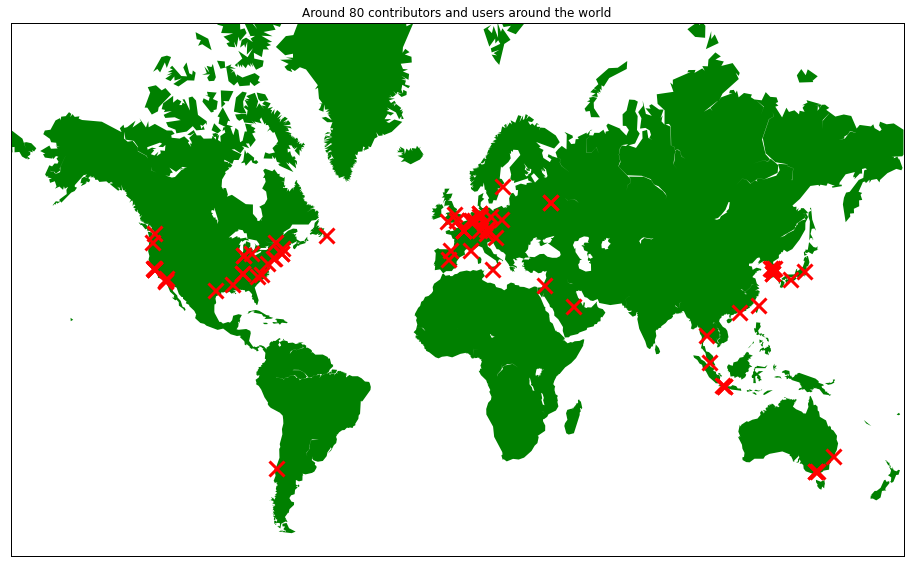

In [7]:
# Make this plot larger.
plt.figure(figsize=(16,12))

#eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 10000000.0,
#              lat_0=0, lon_0=0)

eq_map = Basemap(projection='merc',llcrnrlat=-60,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=60,resolution='c')
#eq_map.drawcoastlines()
#eq_map.drawcountries()
eq_map.fillcontinents(color = 'green')
eq_map.drawmapboundary()
#eq_map.drawmeridians(np.arange(0, 360, 30))
#eq_map.drawparallels(np.arange(-90, 90, 30))
 
for k in range(NbContrib):
    #print k
    x,y = eq_map(Contrib[3][k], Contrib[2][k])
    eq_map.plot(x, y, marker='x', color='r', markersize=15,mew=3)

title_string = "Around "+str(NbContrib)+" contributors and users around the world" 
plt.title(title_string)
plt.savefig("map.jpg", bbox_inches='tight')
plt.show()

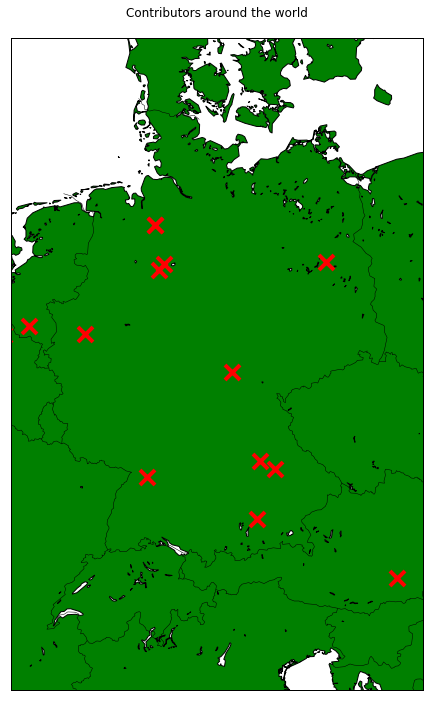

In [8]:
# Make this plot larger.
plt.figure(figsize=(16,12))

eq_map = Basemap(projection='merc', resolution = 'i',area_thresh = 1,
llcrnrlat=45.0,
llcrnrlon=5.0,
urcrnrlat=56.0,
urcrnrlon=16)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'green')
eq_map.drawmapboundary()
 
for k in range(NbContrib):
    #print k
    x,y = eq_map(Contrib[3][k], Contrib[2][k])
    eq_map.plot(x, y, 'rx', markersize=15,mew=4)

title_string = "Contributors around the world\n" 
plt.title(title_string)
plt.savefig("germany.jpg", bbox_inches='tight')
plt.show()

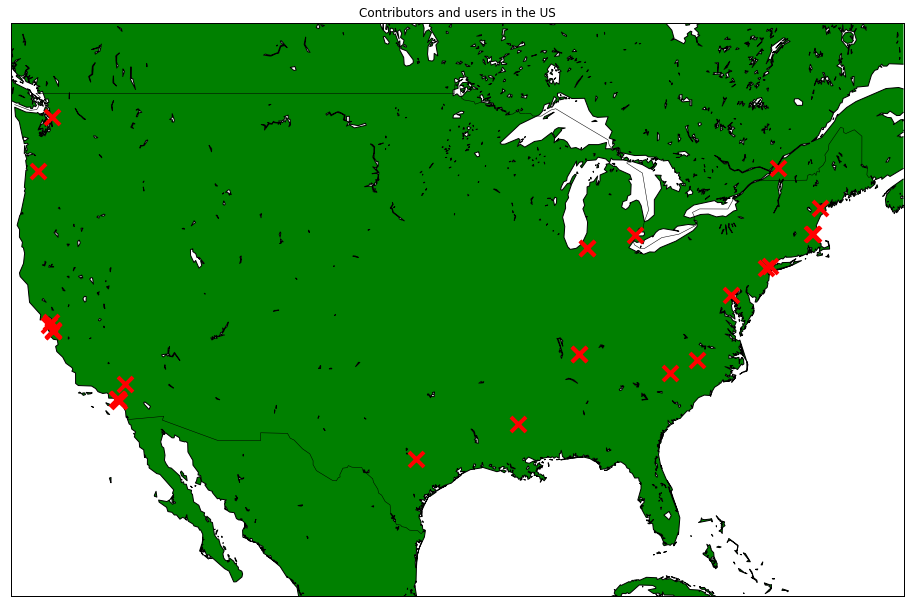

In [9]:
# Make this plot larger.
plt.figure(figsize=(16,12))
Lt = 37
Lo = -95
LtE = 15
LoE = 30
eq_map = Basemap(projection='merc', resolution = 'l',area_thresh = 10,
llcrnrlat=Lt-LtE,
llcrnrlon=Lo-LoE,
urcrnrlat=Lt+LtE,
urcrnrlon=Lo+LoE)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'green')
eq_map.drawmapboundary()
 
for k in range(NbContrib):
    #print k
    x,y = eq_map(Contrib[3][k], Contrib[2][k])
    eq_map.plot(x, y, 'rx', markersize=15,mew=4)

title_string = "Contributors and users in the US" 
plt.title(title_string)
plt.savefig("us.jpg", bbox_inches='tight')
plt.show()

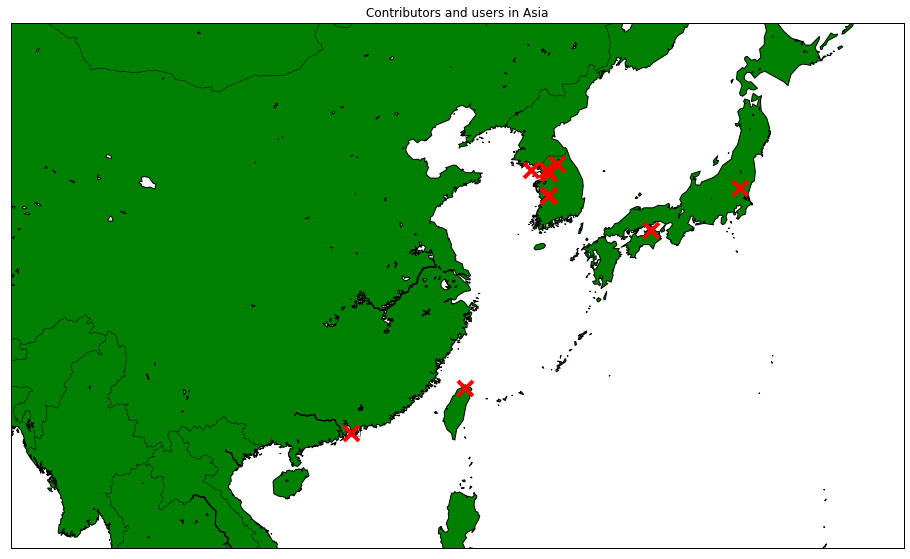

In [10]:
# Make this plot larger.
plt.figure(figsize=(16,12))
Lt = 30
Lo = 121
LtE = 15
LoE = 30
eq_map = Basemap(projection='merc', resolution = 'l',area_thresh = 10,
llcrnrlat=Lt-LtE,
llcrnrlon=Lo-LoE,
urcrnrlat=Lt+LtE,
urcrnrlon=Lo+LoE)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'green')
eq_map.drawmapboundary()
 
for k in range(NbContrib):
    #print k
    x,y = eq_map(Contrib[3][k], Contrib[2][k])
    eq_map.plot(x, y, 'rx', markersize=15,mew=4)

title_string = "Contributors and users in Asia" 
plt.title(title_string)
plt.savefig("asia.jpg", bbox_inches='tight')
plt.show()

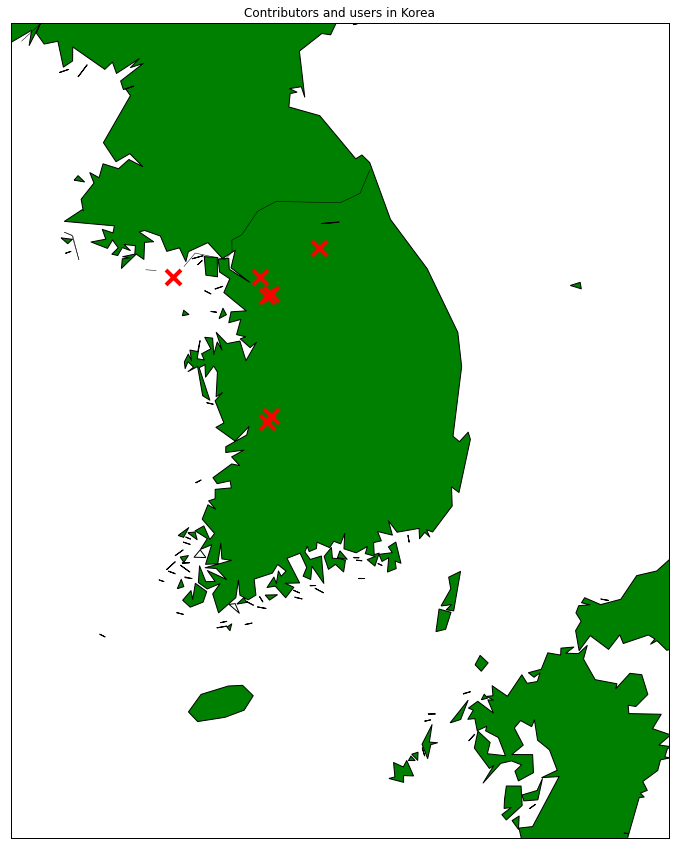

In [11]:
# Make this plot larger.
plt.figure(figsize=(15,15))
Lt = 36
Lo = 128
LtE = 4
LoE = 4
eq_map = Basemap(projection='merc', resolution = 'l',area_thresh = 10,
llcrnrlat=Lt-LtE,
llcrnrlon=Lo-LoE,
urcrnrlat=Lt+LtE,
urcrnrlon=Lo+LoE)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'green')
eq_map.drawmapboundary()
 
for k in range(NbContrib):
    #print k
    x,y = eq_map(Contrib[3][k], Contrib[2][k])
    eq_map.plot(x, y, 'rx', markersize=15,mew=4)

title_string = "Contributors and users in Korea" 
plt.title(title_string)
plt.savefig("korea.jpg", bbox_inches='tight')
plt.show()